# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
# Code Here
!pip install sklearn
!pip install palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins
penguins=load_penguins()
penguins=pd.get_dummies(penguins)
penguins=penguins.dropna()
penguins.head()

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=0260e5091c1dffc2fe8f421daf27acbb9b2c01171b35ff850a83b4dfb2e01a95
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,0,1


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

linear_model2=LinearRegression()
X2=penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Adelie', 'species_Chinstrap',]]
y2=penguins['bill_depth_mm']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=.25)
lr_fit2=linear_model2.fit(X2_train, y2_train)
y_pred_train_2=lr_fit2.predict(X2_train)
y_pred_test_2=lr_fit2.predict(X2_test)
mse_train_2=mean_squared_error(y2_train, y_pred_train_2)
mse_test_2=mean_squared_error(y2_test, y_pred_test_2)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [4]:
X=penguins.drop('bill_depth_mm', axis=1)
y=penguins['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn_pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])
knn_pipeline_1.fit(X_train, y_train)
y_pred_knn_train_1=knn_pipeline_1.predict(X_train)
y_pred_knn_test_1=knn_pipeline_1.predict(X_test)
mse_knn_train_1=mean_squared_error(y_pred_knn_train_1, y_train)
mse_knn_test_1=mean_squared_error(y_pred_knn_test_1, y_test)

knn_pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=20))
])
knn_pipeline_2.fit(X_train, y_train)
y_pred_knn_train_2=knn_pipeline_2.predict(X_train)
y_pred_knn_test_2=knn_pipeline_2.predict(X_test)
mse_knn_train_2=mean_squared_error(y_pred_knn_train_2, y_train)
mse_knn_test_2=mean_squared_error(y_pred_knn_test_2, y_test)

In [5]:
decisiontree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor(random_state=42))
])
decisiontree_pipeline.fit(X_train, y_train)
y_pred_dt_train=decisiontree_pipeline.predict(X_train)
y_pred_dt_test=decisiontree_pipeline.predict(X_test)
mse_dt_train=mean_squared_error(y_pred_dt_train, y_train)
mse_dt_test=mean_squared_error(y_pred_dt_test, y_test)

In [6]:
mse_train=[['Linear Model','knn_5_neighbors','knn_20_neighbors','decision_tree'],[mse_train_2, mse_knn_train_1, mse_knn_train_2, mse_dt_train]]
mse_test=[['Linear Model','knn_5_neighbors','knn_20_neighbors','decision_tree'],[mse_test_2, mse_knn_test_1, mse_knn_test_2, mse_dt_test]]
df_mse_train=pd.DataFrame(mse_train).transpose()
df_mse_test=pd.DataFrame(mse_test).transpose()
df_mse_train.columns=['Type of Model','MSE Train']
df_mse_test.columns=['Type of Model','MSE Test']
df_mse=df_mse_train.merge(df_mse_test, on=['Type of Model'])
df_mse

,Type of Model,MSE Train,MSE Test
0,Linear Model,0.738284,0.593038
1,knn_5_neighbors,0.424741,0.844167
2,knn_20_neighbors,0.631043,0.776378
3,decision_tree,0.0,1.618721


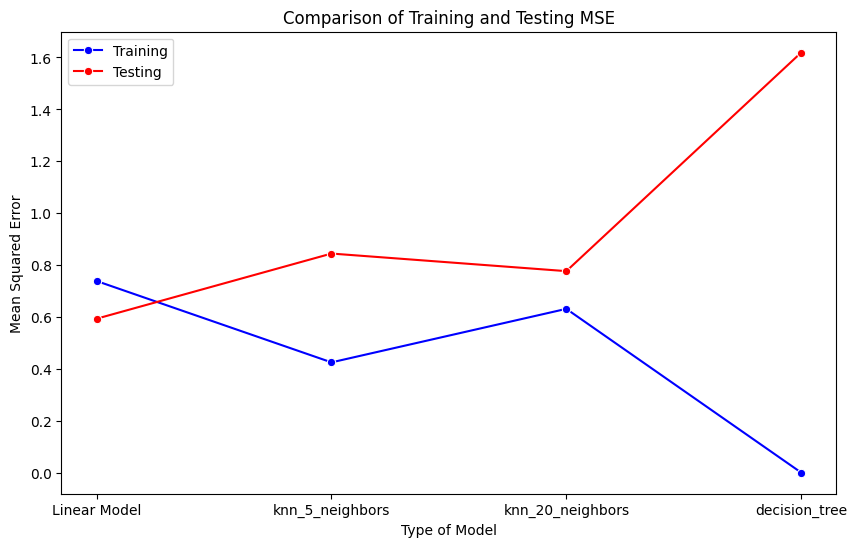

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.lineplot(x='Type of Model', y='MSE Train', data=df_mse, label='Training', marker='o', color='blue')
sns.lineplot(x='Type of Model', y='MSE Test', data=df_mse, label='Testing', marker='o', color='red')
plt.title("Comparison of Training and Testing MSE")
plt.xlabel("Type of Model")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()